In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from autoencoder import autoencoder
from tensorflow.keras.datasets import mnist
from tensorflow.keras.initializers import VarianceScaling

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)

## K-Means

In [3]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

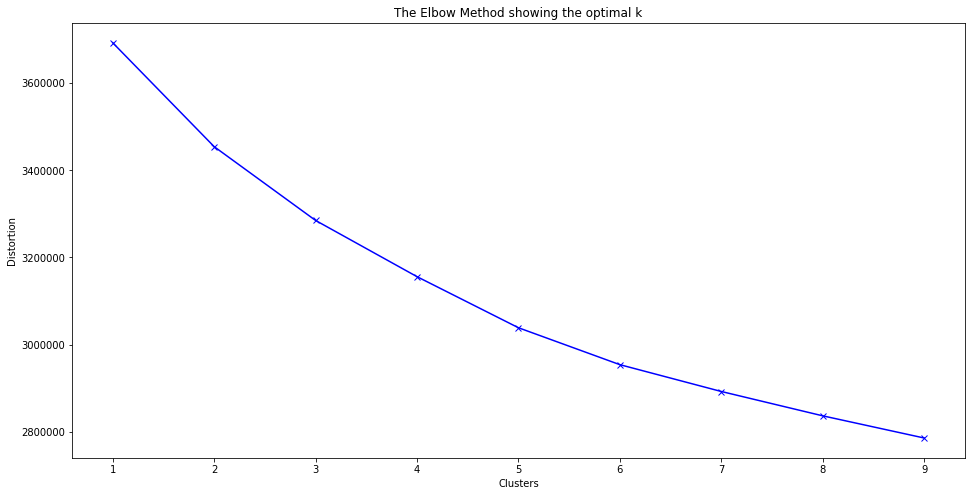

In [4]:
plt.figure(figsize = (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [5]:
n_clusters = len(np.unique(y))

kmeans = KMeans(n_clusters = n_clusters, n_init = 20, n_jobs = 4)

y_pred_kmeans = kmeans.fit_predict(x)

metrics.accuracy_score(y, y_pred_kmeans)

0.0293

## AutoEncoder

In [ ]:
dims = [x.shape[-1], 500, 500, 2000, 10]
init = VarianceScaling(scale = 1. / 3., mode = 'fan_in',
                           distribution = 'uniform')
pretrain_optimizer = SGD(lr = 1, momentum = 0.9)
pretrain_epochs = 300
batch_size = 256

In [ ]:
autoencoder, encoder = autoencoder(dims, init = init)

In [ ]:
tf.keras.utils.plot_model(encoder, show_shapes = True, dpi = 64)

In [ ]:
tf.keras.utils.plot_model(autoencoder, show_shapes = True, dpi = 64)

In [ ]:
autoencoder.compile(optimizer = pretrain_optimizer, loss = 'mse')
autoencoder.fit(x, x, batch_size = batch_size, epochs = pretrain_epochs)